In [28]:
import sourmash
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product, combinations

In [29]:
# read taxonomy into useful sourmash format
from sourmash.tax import tax_utils
taxdb = 'gtdb-rs207.taxonomy.csv'
#taxdb = 'gtdb-rs207.taxonomy.reps.csv'
tax_assign = tax_utils.MultiLineageDB.load([taxdb],
                                           keep_full_identifiers=False,
                                           keep_identifier_versions=False )

In [30]:
# read in signature info
siginfocsv = "gtdb-rs207.genomic.k31.describe.csv"
sigInf = pd.read_csv(siginfocsv)
sigInf['ident'] = sigInf['name'].str.split(' ', expand=True)[0]
sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1


In [31]:
sigInf['lineage'] = sigInf['ident'].apply(lambda x: tax_utils.find_match_lineage(x, tax_assign))
sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


In [32]:
# subset to just the reps:
reps = 'gtdb-rs207.taxonomy.reps.csv'
repD = pd.read_csv(reps)
rep_idents = repD['ident'].tolist()
len(rep_idents)

65740

In [73]:
taxD = pd.read_csv(taxdb)
taxD.shape

(317542, 10)

In [6]:
repInf = sigInf[sigInf['ident'].isin(rep_idents)]
repInf.shape

(65740, 15)

In [7]:
repInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
11,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,b1d24135bc51cc8e9ef65f1f20616a22,31,DNA,0,1000,2142,42,1,"GCA_018665005.1 Flavobacteriales bacterium, AS...",/dev/fd/63,CC0,2164,GCA_018665005.1,"((superkingdom, d__Bacteria), (phylum, p__Bact..."
16,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,d0482b4782ce91acb9b76cd7dcd87898,31,DNA,0,1000,4903,42,1,GCA_004116405.1 Haloferacaceae archaeon SYSU A...,/dev/fd/63,CC0,4956,GCA_004116405.1,"((superkingdom, d__Archaea), (phylum, p__Halob..."
22,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,618ec0efeaa14f84e9a55dbd58d4caec,31,DNA,0,1000,5568,42,1,GCF_014109765.1 Pseudomonas sp. MSPm1 strain=M...,/dev/fd/63,CC0,5599,GCF_014109765.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


## First, pick the largest and smallest genomes/signatures

Text(0, 0.5, 'Frequency')

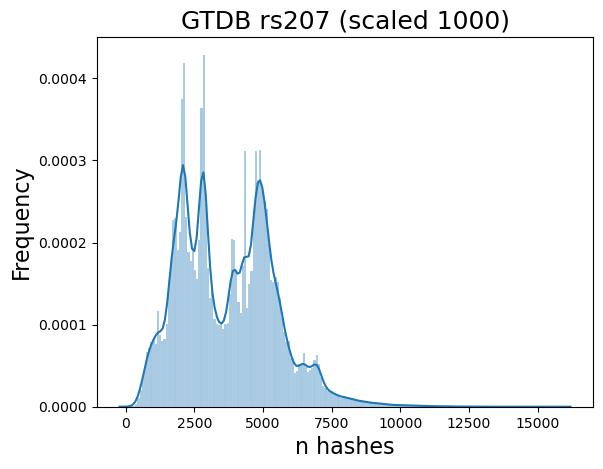

In [8]:
sns.histplot(sigInf['n_hashes'], kde=True, alpha=.4, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, .4))
plt.title('GTDB rs207 (scaled 1000)', fontsize=18)
plt.xlabel('n hashes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

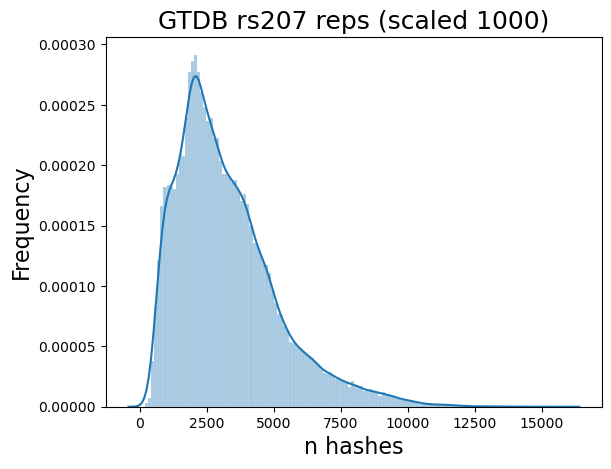

In [9]:
sns.histplot(repInf['n_hashes'], kde=True, alpha=.4, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, .4))
plt.title('GTDB rs207 reps (scaled 1000)', fontsize=18)
plt.xlabel('n hashes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [10]:
# largest 100, smallest 100
sigInf.nlargest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
105137,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,6414370e8735a86a076021b0e5306e18,31,DNA,0,1000,15788,42,1,GCF_001931535.1 Minicystis rosea strain=DSM 24...,/dev/fd/63,CC0,15922,GCF_001931535.1,"((superkingdom, d__Bacteria), (phylum, p__Myxo..."
78781,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,e2761b9d0eb85c2a0b5b0c3dddcbe7e0,31,DNA,0,1000,14502,42,1,"GCA_018666605.1 Lentisphaerae bacterium, ASM18...",/dev/fd/63,CC0,14569,GCA_018666605.1,"((superkingdom, d__Bacteria), (phylum, p__Verr..."


In [11]:
# largest 100, smallest 100
repInf.nlargest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
105137,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,6414370e8735a86a076021b0e5306e18,31,DNA,0,1000,15788,42,1,GCF_001931535.1 Minicystis rosea strain=DSM 24...,/dev/fd/63,CC0,15922,GCF_001931535.1,"((superkingdom, d__Bacteria), (phylum, p__Myxo..."
61862,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,b393ad4dde1e730fb72b80554842b835,31,DNA,0,1000,14436,42,1,GCF_000418325.1 Sorangium cellulosum So0157-2 ...,/dev/fd/63,CC0,14740,GCF_000418325.1,"((superkingdom, d__Bacteria), (phylum, p__Myxo..."


In [12]:
sigInf.nsmallest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
295865,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,765c74fa25d2e79dd35de2d49f2291e5,31,DNA,0,1000,187,42,1,GCF_002682985.1 Candidatus Tremblaya phenacola...,/dev/fd/63,CC0,206,GCF_002682985.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
305394,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,279a608b9cc0d67cc56979f49fd57123,31,DNA,0,1000,188,42,1,GCA_000147015.1 Candidatus Zinderia insecticol...,/dev/fd/63,CC0,188,GCA_000147015.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


In [13]:
repInf.nsmallest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
295865,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,765c74fa25d2e79dd35de2d49f2291e5,31,DNA,0,1000,187,42,1,GCF_002682985.1 Candidatus Tremblaya phenacola...,/dev/fd/63,CC0,206,GCF_002682985.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
305394,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,279a608b9cc0d67cc56979f49fd57123,31,DNA,0,1000,188,42,1,GCA_000147015.1 Candidatus Zinderia insecticol...,/dev/fd/63,CC0,188,GCA_000147015.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


In [14]:
# create comparison csv for largest x smallest signatures
# start with 10 x 10
largest = sigInf.nlargest(10, 'n_hashes')['ident'].tolist()
smallest = sigInf.nsmallest(10, 'n_hashes')['ident'].tolist()
print(largest)

['GCF_001931535.1', 'GCA_018666605.1', 'GCF_000418325.1', 'GCA_018694235.1', 'GCF_005893125.1', 'GCF_004135755.1', 'GCF_002950945.1', 'GCA_018676675.1', 'GCF_016863635.1', 'GCF_003044305.1']


In [15]:
# get all comparisons between these lists --PRODUCT??
size_comp = list(product(largest, smallest))
len(size_comp)

100

In [16]:
size_comp[:5]

[('GCF_001931535.1', 'GCF_002682985.1'),
 ('GCF_001931535.1', 'GCA_000147015.1'),
 ('GCF_001931535.1', 'GCF_004296495.1'),
 ('GCF_001931535.1', 'GCF_017656055.1'),
 ('GCF_001931535.1', 'GCA_015134435.1')]

In [17]:
scD = pd.DataFrame(size_comp, columns =['identA', 'identB'])
scD['comparison_reason'] = "size-diff"
scD.head()

,identA,identB,comparison_reason
0,GCF_001931535.1,GCF_002682985.1,size-diff
1,GCF_001931535.1,GCA_000147015.1,size-diff
2,GCF_001931535.1,GCF_004296495.1,size-diff
3,GCF_001931535.1,GCF_017656055.1,size-diff
4,GCF_001931535.1,GCA_015134435.1,size-diff


In [18]:
scD.to_csv('gtdb-comparisons.largest-size-diff.n10.csv', index=False)

In [19]:
# just for reps: create comparison csv for largest x smallest signatures
# start with 10 x 10
rep_largest = repInf.nlargest(10, 'n_hashes')['ident'].tolist()
rep_smallest = repInf.nsmallest(10, 'n_hashes')['ident'].tolist()
rep_size_comp = list(product(rep_largest, rep_smallest))
r_scD = pd.DataFrame(rep_size_comp, columns =['identA', 'identB'])
r_scD['comparison_reason'] = "size-diff"
r_scD.head()

,identA,identB,comparison_reason
0,GCF_001931535.1,GCF_002682985.1,size-diff
1,GCF_001931535.1,GCA_000147015.1,size-diff
2,GCF_001931535.1,GCF_017656055.1,size-diff
3,GCF_001931535.1,GCA_015134435.1,size-diff
4,GCF_001931535.1,GCA_000331975.1,size-diff


In [20]:
r_scD.to_csv('gtdb-comparisons.reps.largest-size-diff.n10.csv', index=False)

In [21]:
# now do 15 largest
largest = sigInf.nlargest(15, 'n_hashes')['ident'].tolist()
smallest = sigInf.nsmallest(15, 'n_hashes')['ident'].tolist()
print(largest)
scD = pd.DataFrame(size_comp, columns =['identA', 'identB'])
scD['comparison_reason'] = "size-diff"
scD.to_csv('gtdb-comparisons.largest-size-diff.n15.csv', index=False)

['GCF_001931535.1', 'GCA_018666605.1', 'GCF_000418325.1', 'GCA_018694235.1', 'GCF_005893125.1', 'GCF_004135755.1', 'GCF_002950945.1', 'GCA_018676675.1', 'GCF_016863635.1', 'GCF_003044305.1', 'GCF_009725235.1', 'GCF_005889725.1', 'GCF_012933655.1', 'GCF_010894405.1', 'GCF_900323885.1']


In [26]:
# 15 largest, repso only
rep_largest = repInf.nlargest(15, 'n_hashes')['ident'].tolist()
rep_smallest = repInf.nsmallest(15, 'n_hashes')['ident'].tolist()
rep_size_comp = list(product(rep_largest, rep_smallest))
r_scD = pd.DataFrame(rep_size_comp, columns =['identA', 'identB'])
r_scD['comparison_reason'] = "size-diff"
r_scD.to_csv('gtdb-comparisons.reps.largest-size-diff.n15.csv', index=False)

In [27]:
# drop out tail of smallest: require at least 500 hashes
rep500plus = repInf[repInf['n_hashes'] >= 500]
rep_largest = rep500plus.nlargest(100, 'n_hashes')['ident'].tolist()
rep_smallest = rep500plus.nsmallest(100, 'n_hashes')['ident'].tolist()
rep_size_comp = list(product(rep_largest, rep_smallest))
r_scD = pd.DataFrame(rep_size_comp, columns =['identA', 'identB'])
r_scD['comparison_reason'] = "size-diff"
r_scD.to_csv('gtdb-comparisons.reps500plus.largest-size-diff.n100.csv', index=False)

## Now, let's pick a taxonomy-informed set of genomes to compare

In [23]:
# let's grab the taxonomy file, and take 2 from every phylum

In [24]:
repD['phylum_lineage'] = repD['superkingdom'] + ';' + repD['phylum'] # \
                   #+ ';' + repD['class'] + ';' + \
                  #repD['order'] + ';' + repD['family'] + ';' + \
                  #repD['genus'] + ';' + repD['species']
repD.head()

,ident,superkingdom,phylum,class,order,family,genus,species,is_representative,signame,phylum_lineage
0,GCF_003697165.2,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,True,GCF_003697165.2 s__Escherichia coli,d__Bacteria;p__Proteobacteria
1,GCF_001027105.1,d__Bacteria,p__Firmicutes,c__Bacilli,o__Staphylococcales,f__Staphylococcaceae,g__Staphylococcus,s__Staphylococcus aureus,True,GCF_001027105.1 s__Staphylococcus aureus,d__Bacteria;p__Firmicutes
2,GCF_000006945.2,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Salmonella,s__Salmonella enterica,True,GCF_000006945.2 s__Salmonella enterica,d__Bacteria;p__Proteobacteria
3,GCF_000742135.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella pneumoniae,True,GCF_000742135.1 s__Klebsiella pneumoniae,d__Bacteria;p__Proteobacteria
4,GCF_001457635.1,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus pneumoniae,True,GCF_001457635.1 s__Streptococcus pneumoniae,d__Bacteria;p__Firmicutes


In [25]:
repD['phylum_lineage'].nunique()

189

In [26]:
# take first entry in each phylum to start, then groupby superkingdom and take 5 Archaea and 10 Bacteria# 
# or instead of group

one_per_phylum = repD.groupby('phylum_lineage').nth(1).reset_index()
one_per_phylum.head()


,phylum_lineage,ident,superkingdom,phylum,class,order,family,genus,species,is_representative,signame
0,d__Archaea;p__Aenigmatarchaeota,GCA_011772645.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__QMZP01,f__QMZT01,g__CS3-C152,s__CS3-C152 sp011772645,True,GCA_011772645.1 s__CS3-C152 sp011772645
1,d__Archaea;p__Altiarchaeota,GCA_018897475.1,d__Archaea,p__Altiarchaeota,c__Altiarchaeia,o__IMC4,f__QMZM01,g__WALD01,s__WALD01 sp018897475,True,GCA_018897475.1 s__WALD01 sp018897475
2,d__Archaea;p__Asgardarchaeota,GCA_018238625.1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__CR-4,f__SOKP01,g__SOKP01,s__SOKP01 sp018238625,True,GCA_018238625.1 s__SOKP01 sp018238625
3,d__Archaea;p__B1Sed10-29,GCA_003558235.1,d__Archaea,p__B1Sed10-29,c__B1Sed10-29,o__B1Sed10-29,f__B1Sed10-29,g__CSSED10-269,s__CSSED10-269 sp003558235,True,GCA_003558235.1 s__CSSED10-269 sp003558235
4,d__Archaea;p__EX4484-52,GCA_015520895.1,d__Archaea,p__EX4484-52,c__EX4484-52,o__EX4484-52,f__JAADEF01,g__JAADEF01,s__JAADEF01 sp015520895,True,GCA_015520895.1 s__JAADEF01 sp015520895


In [27]:
arch = one_per_phylum[one_per_phylum['superkingdom'] == 'd__Archaea'][:5]
arch

,phylum_lineage,ident,superkingdom,phylum,class,order,family,genus,species,is_representative,signame
0,d__Archaea;p__Aenigmatarchaeota,GCA_011772645.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__QMZP01,f__QMZT01,g__CS3-C152,s__CS3-C152 sp011772645,True,GCA_011772645.1 s__CS3-C152 sp011772645
1,d__Archaea;p__Altiarchaeota,GCA_018897475.1,d__Archaea,p__Altiarchaeota,c__Altiarchaeia,o__IMC4,f__QMZM01,g__WALD01,s__WALD01 sp018897475,True,GCA_018897475.1 s__WALD01 sp018897475
2,d__Archaea;p__Asgardarchaeota,GCA_018238625.1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__CR-4,f__SOKP01,g__SOKP01,s__SOKP01 sp018238625,True,GCA_018238625.1 s__SOKP01 sp018238625
3,d__Archaea;p__B1Sed10-29,GCA_003558235.1,d__Archaea,p__B1Sed10-29,c__B1Sed10-29,o__B1Sed10-29,f__B1Sed10-29,g__CSSED10-269,s__CSSED10-269 sp003558235,True,GCA_003558235.1 s__CSSED10-269 sp003558235
4,d__Archaea;p__EX4484-52,GCA_015520895.1,d__Archaea,p__EX4484-52,c__EX4484-52,o__EX4484-52,f__JAADEF01,g__JAADEF01,s__JAADEF01 sp015520895,True,GCA_015520895.1 s__JAADEF01 sp015520895


In [28]:
bact = one_per_phylum[one_per_phylum['superkingdom'] == 'd__Bacteria'][:10]
bact

,phylum_lineage,ident,superkingdom,phylum,class,order,family,genus,species,is_representative,signame
19,d__Bacteria;p__4484-113,GCA_016932385.1,d__Bacteria,p__4484-113,c__4484-113,o__4484-113,f__JAFGCY01,g__JAFGCY01,s__JAFGCY01 sp016932385,True,GCA_016932385.1 s__JAFGCY01 sp016932385
20,d__Bacteria;p__4572-55,GCA_002084765.1,d__Bacteria,p__4572-55,c__4572-55,o__4572-55,f__4572-55,g__4572-55,s__4572-55 sp002084765,True,GCA_002084765.1 s__4572-55 sp002084765
21,d__Bacteria;p__AABM5-125-24,GCA_018644935.1,d__Bacteria,p__AABM5-125-24,c__AABM5-125-24,o__AABM5-125-24,f__AABM5-125-24,g__JABGPL01,s__JABGPL01 sp018644935,True,GCA_018644935.1 s__JABGPL01 sp018644935
22,d__Bacteria;p__Abyssubacteria,GCA_003598085.1,d__Bacteria,p__Abyssubacteria,c__SURF-5,o__SURF-5,f__SURF-5,g__SURF-5,s__SURF-5 sp003598085,True,GCA_003598085.1 s__SURF-5 sp003598085
23,d__Bacteria;p__Acidobacteriota,GCA_903913215.1,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Holophagales,f__Holophagaceae,g__Geothrix,s__Geothrix sp903913215,True,GCA_903913215.1 s__Geothrix sp903913215
24,d__Bacteria;p__Actinobacteriota,GCA_000069185.1,d__Bacteria,p__Actinobacteriota,c__Actinomycetia,o__Mycobacteriales,f__Mycobacteriaceae,g__Mycobacterium,s__Mycobacterium abscessus,True,GCA_000069185.1 s__Mycobacterium abscessus
25,d__Bacteria;p__Aerophobota,GCA_005223085.1,d__Bacteria,p__Aerophobota,c__Aerophobia,o__Aerophobales,f__AE-B3A,g__AE-B3B,s__AE-B3B sp005223085,True,GCA_005223085.1 s__AE-B3B sp005223085
26,d__Bacteria;p__Aquificota,GCF_000213785.1,d__Bacteria,p__Aquificota,c__Aquificae,o__Aquificales,f__Hydrogenobaculaceae,g__Hydrogenobaculum,s__Hydrogenobaculum sp000213785,True,GCF_000213785.1 s__Hydrogenobaculum sp000213785
27,d__Bacteria;p__Armatimonadota,GCA_015709495.1,d__Bacteria,p__Armatimonadota,c__Fimbriimonadia,o__Fimbriimonadales,f__Fimbriimonadaceae,g__H1-ARM1,s__H1-ARM1 sp001567425,True,GCA_015709495.1 s__H1-ARM1 sp001567425
28,d__Bacteria;p__Atribacterota,GCA_018402425.1,d__Bacteria,p__Atribacterota,c__JS1,o__SB-45,f__UBA6794,g__M30B28,s__M30B28 sp018402425,True,GCA_018402425.1 s__M30B28 sp018402425


In [29]:
arch_idents = arch['ident'].tolist()
bact_idents = bact['ident'].tolist()
dist_idents = arch_idents+bact_idents
print(', '.join(dist_idents))

GCA_011772645.1, GCA_018897475.1, GCA_018238625.1, GCA_003558235.1, GCA_015520895.1, GCA_016932385.1, GCA_002084765.1, GCA_018644935.1, GCA_003598085.1, GCA_903913215.1, GCA_000069185.1, GCA_005223085.1, GCF_000213785.1, GCA_015709495.1, GCA_018402425.1


In [30]:
rep_dist = list(combinations(dist_idents, 2)) 
distD = pd.DataFrame(rep_dist, columns =['identA', 'identB'])
distD['comparison_reason'] = "dist"
distD.head()

,identA,identB,comparison_reason
0,GCA_011772645.1,GCA_018897475.1,dist
1,GCA_011772645.1,GCA_018238625.1,dist
2,GCA_011772645.1,GCA_003558235.1,dist
3,GCA_011772645.1,GCA_015520895.1,dist
4,GCA_011772645.1,GCA_016932385.1,dist


In [31]:
distD.shape

(105, 3)

In [32]:
distD.to_csv("gtdb-comparisons.reps.phylum-reps.n15.csv", index=False)

In [ ]:
# phylum is for protein comparisons. let's try family for k21 (AND THEN GENUS)

In [33]:
repD['family_lineage'] = repD['superkingdom'] + ';' + repD['phylum']  \
                                             + ';' + repD['class'] + ';' \
                                             + repD['order'] + ';' + repD['family']# + ';' + \
                                            #  + repD['genus'] #+ ';' + repD['species']
repD['family_lineage'].nunique()

4107

In [38]:
#two_per_family = repD.groupby('family_lineage').reset_index().drop_duplicates('genus').nth(2).reset_index()
two_per_family = repD.groupby('family_lineage').nth(2).reset_index()
two_per_family.shape

(2001, 11)

In [40]:
two_per_family['ident']

0       GCA_016933455.1
1       GCA_017608955.1
2       GCA_011047985.1
3       GCA_016177025.1
4       GCA_018304585.1
             ...       
1996    GCA_016708025.1
1997    GCA_016933955.1
1998    GCA_014728145.1
1999    GCA_001304155.1
2000    GCA_002791595.1
Name: ident, Length: 2001, dtype: object

In [41]:
two_per_genus = repD.groupby('genus').nth(2).reset_index()
two_per_genus.shape

(4667, 11)

In [46]:
gen2_100 = two_per_genus['ident'].tolist()[:100]
gen2_100[:4]

['GCA_016874945.1', 'GCA_016206955.1', 'GCA_002763225.1', 'GCA_013204355.1']

In [59]:
from itertools import combinations
gen2 = list(combinations(gen2_100, 2))
g_scD = pd.DataFrame(gen2, columns =['identA', 'identB'])
g_scD['comparison_reason'] = "two-per-genus"
g_scD.to_csv('gtdb-comparisons.two-per-genus.n100.csv', index=False)

In [58]:
len(gen2)

4950

In [56]:
gen2[:4]

[('GCA_016874945.1', 'GCA_016206955.1'),
 ('GCA_016874945.1', 'GCA_002763225.1'),
 ('GCA_016874945.1', 'GCA_013204355.1'),
 ('GCA_016874945.1', 'GCA_004296925.1')]

In [68]:
first_200 = repD['ident'].tolist()[:200]
first_200
first200_comb = list(combinations(first_200, 2))
g_scD = pd.DataFrame(first200_comb, columns =['identA', 'identB'])
g_scD['comparison_reason'] = "first-200"
g_scD.to_csv('gtdb-comparisons.reps.n200.csv', index=False)

In [69]:
first_100 = repD['ident'].tolist()[:100]
first_100
first100_comb = list(combinations(first_100, 2))
g_scD = pd.DataFrame(first100_comb, columns =['identA', 'identB'])
g_scD['comparison_reason'] = "first-100"
g_scD.to_csv('gtdb-comparisons.reps.n100.csv', index=False)

In [72]:
#sigInf

In [90]:
two_per_species = taxD.groupby('species').nth(2).reset_index()
two_per_species.shape
sp2_100 = two_per_species['ident'].tolist()[1500:1600]
sp2_100[:4]
sp2 = list(combinations(sp2_100, 2))
sc2 = pd.DataFrame(sp2, columns =['identA', 'identB'])
sc2['comparison_reason'] = "two-per-species"
sc2.to_csv('gtdb-comparisons.two-per-species.n100.csv', index=False)
sc2.head()

,identA,identB,comparison_reason
0,GCF_000764955.1,GCF_000755945.1,two-per-species
1,GCF_000764955.1,GCF_003034145.1,two-per-species
2,GCF_000764955.1,GCF_001530485.1,two-per-species
3,GCF_000764955.1,GCF_900446275.1,two-per-species
4,GCF_000764955.1,GCF_000731655.1,two-per-species


In [46]:
# take first entry in each phylum to start, then groupby superkingdom and take 5 Archaea and 10 Bacteria# 
# or instead of group

one_per_genus = repD.groupby('genus_lineage').nth(1).reset_index()
one_per_genus.head()


,genus_lineage,ident,superkingdom,phylum,class,order,family,genus,species,is_representative,signame,phylum_lineage,family_lineage
0,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,GCA_011773475.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__Aenigmatarchaeales,f__Aenigmatarchaeaceae,g__CS1-C013,s__CS1-C013 sp011773475,True,GCA_011773475.1 s__CS1-C013 sp011773475,d__Archaea;p__Aenigmatarchaeota,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...
1,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,GCA_015661515.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__Aenigmatarchaeales,f__SZUA-1535,g__SZUA-1535,s__SZUA-1535 sp015661515,True,GCA_015661515.1 s__SZUA-1535 sp015661515,d__Archaea;p__Aenigmatarchaeota,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...
2,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,GCA_017610225.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp017610225,True,GCA_017610225.1 s__CG10238-14 sp017610225,d__Archaea;p__Aenigmatarchaeota,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...
3,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,GCA_018920365.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__CG10238-14,f__CG10238-14,g__JAHLMN01,s__JAHLMN01 sp018920365,True,GCA_018920365.1 s__JAHLMN01 sp018920365,d__Archaea;p__Aenigmatarchaeota,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...
4,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,GCA_016213525.1,d__Archaea,p__Aenigmatarchaeota,c__Aenigmatarchaeia,o__CG10238-14,f__SCSR01,g__JABABT01,s__JABABT01 sp016213525,True,GCA_016213525.1 s__JABABT01 sp016213525,d__Archaea;p__Aenigmatarchaeota,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...


In [48]:

repD['family_lineage'] = repD['superkingdom'] + ';' + repD['phylum']  \
                                              + ';' + repD['class'] + ';' \
                                              + repD['order'] + ';' + repD['family'] #+ ';' + \
                                             # + repD['genus'] #+ ';' + repD['species']
one_per_family = repD.groupby('family_lineage').nth(1).reset_index()
one_per_family.to_csv('gtdb-rs207.reps.one_genome_per_family.csv', index=False)

In [43]:
# actually, what we probably want is TWO per family,so we're doing within-family, cross-genus comparisons

two_genera_per_family = repD.groupby('family_lineage', 'genus')#['genus'].unique()#.nth(2).reset_index()
two_genera_per_family.head()

ValueError: No axis named genus for object type DataFrame

In [ ]:
repD[]

In [33]:
sigInf.head()

# hmm, there are a few ways we could do this. evolpaths was complicated to select...
# i dont really want to use the evolpath style though, just want to select genomes that are v. distant.
# since I actually have the data already, can I select the most distant genomes for comparison? 
#Or hmm.. 50 comparisons in each 10% range, 50-60%, 60-70%, 70-80%, 80-90%, 90-100% (or maybe split this last one in two, at 95%)
# kinda hard to describe how these datasets were chosen, i guess, since it's a bit circular.

#k31 approx thresholds
#50% cANI <- 1e-9
#60% cANI <- 2e-7
#70% cANI <- 2e-
#75% cANI <- 0.0002
#80% cANI <- 0.001
#86% cANI <- 0.01
#92% cANI <- 0.1
#95% cANI <- 0.2
#97% cANI <- 0.4

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
